In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 200)

tours = pd.read_csv('csv_files/tourstrat.csv')
tours.head(100)


tours['TERRITORY'] = tours['TERRITORY'].str.lower()
tours = tours.dropna()

cities = ['denver', 'salt lake city', 'seattle-tacoma', 'minneapolis-st. paul', 'chicago', 'albany-schenectady-troy', 'detroit', 'toronto', 'buffalo', 'montreal', 'atlanta', 'new orleans', 'dallas-ft. worth', 'monterrey', 'ciudad de mã©xico']

tours = tours[tours['TERRITORY'].isin(cities)]
tours = tours.drop(1614)


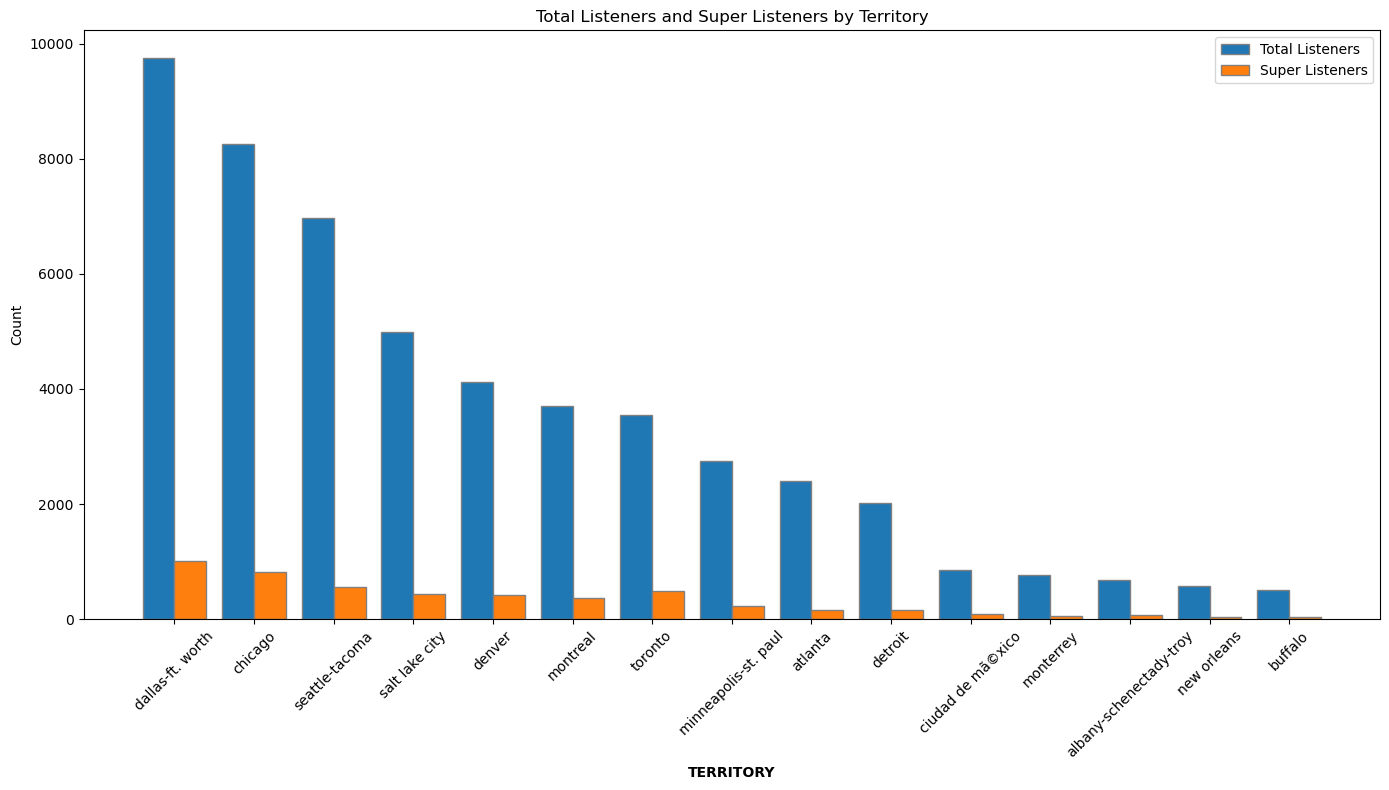

In [5]:
plt.figure(figsize=(14, 8))

# Define the width of the bars
bar_width = 0.4

# Set positions of the bars on the x-axis
r1 = np.arange(len(tours['TERRITORY']))
r2 = [x + bar_width for x in r1]

# Create the bar plots
plt.bar(r1, tours['TOTAL_LISTENERS'], width=bar_width, edgecolor='grey', label='Total Listeners')
plt.bar(r2, tours['SUPER_LISTENERS'], width=bar_width, edgecolor='grey', label='Super Listeners')

# Add labels to the x-axis
plt.xlabel('TERRITORY', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(tours['TERRITORY']))], tours['TERRITORY'], rotation=45)

# Add title and labels
plt.title('Total Listeners and Super Listeners by Territory')
plt.ylabel('Count')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#Note: no data for mexico city

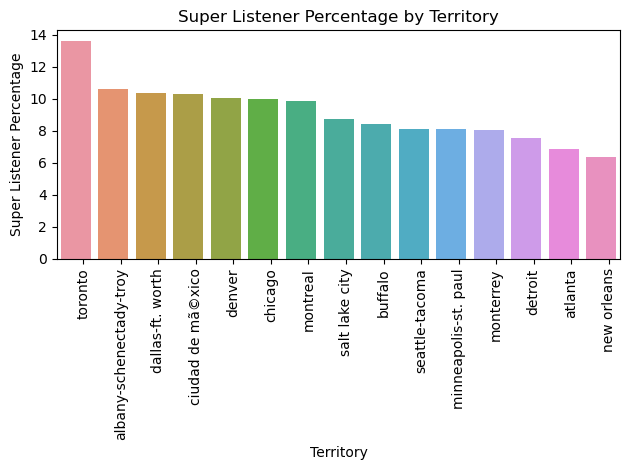

,TERRITORY,COUNTRY_CODE,TOTAL_LISTENERS,SUPER_LISTENERS,SUPER_LISTENER_PCT
2,dallas-ft. worth,US,9746,1010,10.36
3,chicago,US,8257,824,9.98
4,seattle-tacoma,US,6973,565,8.10
7,salt lake city,US,4986,436,8.74
11,denver,US,4115,414,10.06
14,montreal,CA,3702,366,9.89
15,toronto,CA,3543,482,13.60
19,minneapolis-st. paul,US,2749,222,8.08
21,atlanta,US,2395,164,6.85
26,detroit,US,2022,153,7.57


In [6]:
tours_sorted = tours.sort_values(by='SUPER_LISTENER_PCT', ascending=False)


sns.barplot(data=tours_sorted, x='TERRITORY', y='SUPER_LISTENER_PCT')

plt.xticks([r + bar_width / 2 for r in range(len(tours_sorted['TERRITORY']))], tours_sorted['TERRITORY'], rotation=90)
plt.xlabel('Territory')
plt.ylabel('Super Listener Percentage')
plt.title('Super Listener Percentage by Territory')


plt.tight_layout()
plt.show()

#Note: no data for mexico city

tours

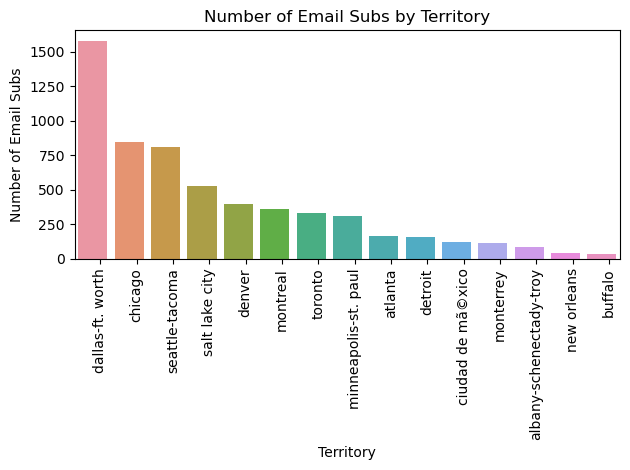

In [7]:
email_subs = pd.read_csv('csv_files/email_subs.csv')
email_subs['TERRITORY'] = email_subs['TERRITORY'] = email_subs['TERRITORY'].str.lower()
email_subs = email_subs[email_subs['TERRITORY'].isin(cities)]

sns.barplot(data=email_subs, x='TERRITORY', y='SUBS')

plt.xticks([r + bar_width / 2 for r in range(len(tours['TERRITORY']))], tours['TERRITORY'], rotation=90)
plt.xlabel('Territory')
plt.ylabel('Number of Email Subs')
plt.title('Number of Email Subs by Territory')


plt.tight_layout()
plt.show()

#Note: no data for mexico city

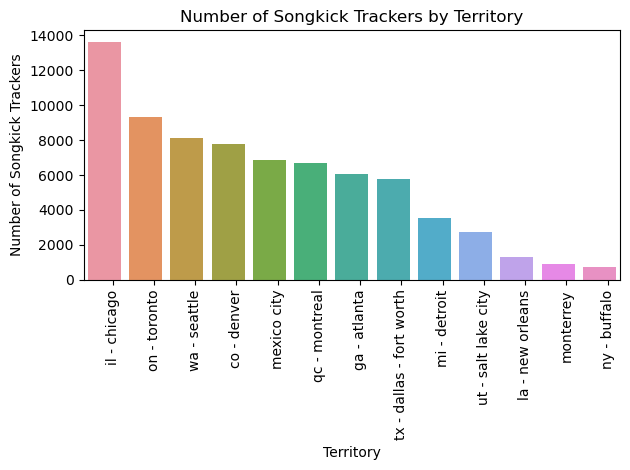

In [10]:
songkick = pd.read_csv('csv_files/songkick.csv')
songkick['LOCATION'] = songkick['LOCATION'].str.lower()

cities2 = ['co - denver', 'ut - salt lake city', 'wa - seattle', 'il - chicago', 'mi - detroit', 'on - toronto', 'ny - buffalo', 'qc - montreal', 'ga - atlanta', 'la - new orleans', 'tx - dallas - fort worth', 'monterrey', 'mexico city']
songkick = songkick[songkick['LOCATION'].isin(cities2)]
songkick
        
sns.barplot(data=songkick, x='LOCATION', y='TRACKERS')

plt.xticks([r + bar_width / 2 for r in range(len(songkick['LOCATION']))], songkick['LOCATION'], rotation=90)
plt.xlabel('Territory')
plt.ylabel('Number of Songkick Trackers')
plt.title('Number of Songkick Trackers by Territory')

plt.tight_layout()
plt.show()

         
# Note: no data for minneapolis, troy

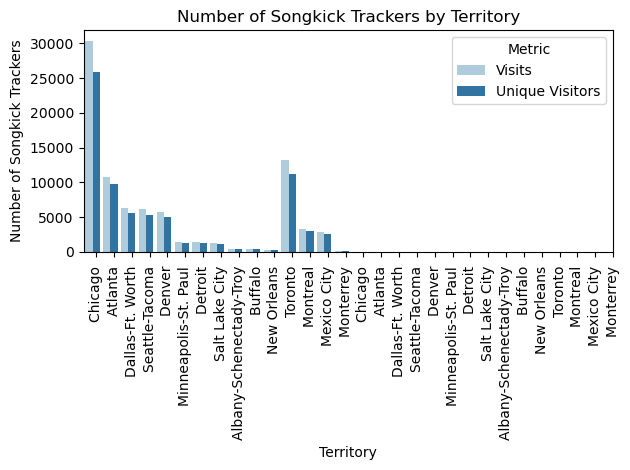

In [11]:
locations = pd.read_csv('csv_files/interestbyloc.csv')
locations.columns = locations.loc[10]
locations = locations.drop(index=range(0, 13), axis=0)
locations = locations = locations.loc[list(range(14, 25)) + [27, 29, 34, 38], :]

locations.columns = ['Country', 'Territory', 'Visits', 'Unique Visitors']

locations['Territory'] = locations['Territory'].str.split('(').str[0]

df_melted = pd.melt(locations, id_vars=['Country', 'Territory'], value_vars=['Visits', 'Unique Visitors'],
                    var_name='Metric', value_name='Count')

# sns.barplot(data=df_melted, x='Territory', y='Count', hue='Metric')
df_melted['Count'] = pd.to_numeric(df_melted['Count'], errors='coerce').astype('Int64')
df_melted

sns.barplot(data=df_melted, x='Territory', y='Count', hue='Metric', palette='Paired')


plt.xticks([r + bar_width / 2 for r in range(len(df_melted['Territory']))], df_melted['Territory'], rotation=90)
plt.xlabel('Territory')
plt.ylabel('Number of Songkick Trackers')
plt.title('Number of Songkick Trackers by Territory')

plt.tight_layout()
plt.show()

In [ ]:
locations['Visits'] = pd.to_numeric(locations['Visits'], errors='coerce').astype(int)
locations['Unique Visitors'] = pd.to_numeric(locations['Unique Visitors'], errors='coerce').astype(int)


plt.figure(figsize=(14, 8))

# Define the width of the bars
bar1_width = 0.4

# Set positions of the bars on the x-axis
r3 = np.arange(len(locations['Territory']))
r4 = [x + bar_width for x in r3]

# Create the bar plots
plt.bar(r3, locations['Visits'], width=bar1_width, edgecolor='grey', label='Visits')
plt.bar(r4, locations['Unique Visitors'], width=bar1_width, edgecolor='grey', label='Unique Visitors')

# Add labels to the x-axis
plt.xlabel('Territory', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(locations['Territory']))], locations['Territory'], rotation=45)

# Add title and labels
plt.title('Visits and Unique Visitors by Territory')
plt.ylabel('Count')


# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
locations